In [14]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.attack import *
from src.create import *
from src.measure import *

# ER

In [117]:
# compute p_in with different parameters 
ERn250k4 = generate_pinf_ER(250, 4, 10)  # ER model, node=250, k=4
ERn1000k4 = generate_pinf_ER(1000, 4, 10)  # ER model, node=1000, k=4
ERn2000k4 = generate_pinf_ER(2000, 4, 10)  # ER model, node=2000, k=4

np.savetxt('./results/ERn250k4.csv', ERn250k4, delimiter=',')
np.savetxt('./results/ERn1000k4.csv', ERn1000k4, delimiter=',')
np.savetxt('./results/ERn2000k4.csv', ERn2000k4, delimiter=',')

...Interdependent Graph Generate Done! 0:00:00.263376
...test: '0.100000' is Done! 0:00:04.138525
...test: '0.188889' is Done! 0:00:04.040490
...test: '0.277778' is Done! 0:00:03.760026
...test: '0.366667' is Done! 0:00:03.651292
...test: '0.455556' is Done! 0:00:03.522667
...test: '0.544444' is Done! 0:00:03.187458
...test: '0.633333' is Done! 0:00:02.946116
...test: '0.722222' is Done! 0:00:02.580583
...test: '0.811111' is Done! 0:00:02.097908
...test: '0.900000' is Done! 0:00:01.336926
...Interdependent Graph Generate Done! 0:00:10.826385
...test: '0.100000' is Done! 0:01:25.905538
...test: '0.188889' is Done! 0:01:21.775883
...test: '0.277778' is Done! 0:01:19.138284
...test: '0.366667' is Done! 0:01:13.014917
...test: '0.455556' is Done! 0:01:12.307735
...test: '0.544444' is Done! 0:01:07.011281
...test: '0.633333' is Done! 0:00:58.785118
...test: '0.722222' is Done! 0:00:50.548176
...test: '0.811111' is Done! 0:00:39.636828
...test: '0.900000' is Done! 0:00:22.073048
...Interdepe

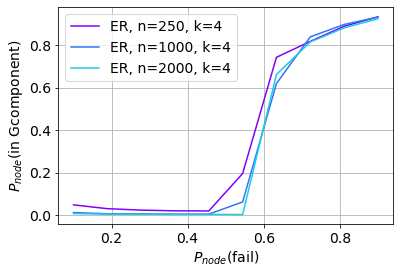

In [118]:
#load
ERn250k4 = np.loadtxt('./results/ERn250k4.csv',delimiter=",")
ERn1000k4 = np.loadtxt('./results/ERn1000k4.csv',delimiter=",")
ERn2000k4 = np.loadtxt('./results/ERn2000k4.csv',delimiter=",")

plot_pinf([ERn250k4, ERn1000k4, ERn2000k4], 4, ["ER, n=250, k=4", "ER, n=1000, k=4", "ER, n=2000, k=4"],
              path="../notebooks/figure/ER_pinf.png", p_theory=False)

# SF

In [ ]:
SFn2000g23 = generate_pinf_SF(2000, 2.3)  # SF model, node=500, gamma=2.3
SFn2000g27 = generate_pinf_SF(2000, 2.7)  # SF model, node=500, gamma=2.7
SFn2000g3 = generate_pinf_SF(2000, 3)  # SF model, node=500, gamma=3

# plot_pinf([SFn2000g23, SFn2000g27, SFn2000g3], 4, ["SF, n=2000, l=2.3", "SF, n=2000, l=2.7", "SF, n=2000, l=3"],
#               path="../notebooks/figure/SF_pinf.png", p_theory=False)

np.savetxt('./results/Sfn2000_23.csv', SFn2000g23, delimiter=',')
np.savetxt('./results/Sfn2000_27.csv', SFn2000g27, delimiter=',')
np.savetxt('./results/SFn2000_3.csv', SFn2000g3, delimiter=',')


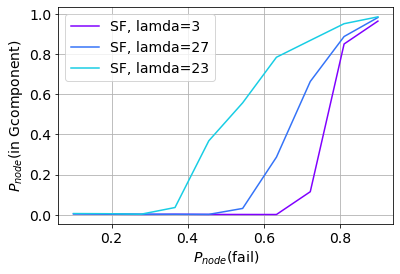

In [115]:
## Expected Outcome : ...it can clearly be seen that for a broader distributionpcis higher.

SFn2000g23 = np.loadtxt('./results/Sfn2000_23.csv',delimiter=",")
SFn2000g27 = np.loadtxt('./results/Sfn2000_27.csv',delimiter=",")
SFn2000g3 = np.loadtxt('./results/SFn2000_3.csv',delimiter=",")

plot_pinf([SFn2000g3, SFn2000g27, SFn2000g23], 4, ["SF, lamda=3", "SF, lamda=2.7", "SF, lamda=2.3"],
              path="../notebooks/figure/SF_pinf.png", p_theory=False)

# plot_pinf([SFn2000g3, SFn2000g27], 4, ["SF, lamda=3", "SF, lamda=27"],
#               path="../notebooks/figure/ER_pinf.png", p_theory=False)

# Paris

In [16]:
vertex_csv = "../data/vertex/vertex.csv"
edge_csv = "../data/edge/edge.csv"

G_train, df_vertex_train, df_edge_train = ParisTranspNetwork(vertex_csv,edge_csv,'train')
G_metro, df_vertex_metro, df_edge_metro = ParisTranspNetwork(vertex_csv,edge_csv,'metro')

G_metro = Paris_NodeSetting(G_metro, df_vertex_metro,1)
G_train = Paris_NodeSetting(G_train, df_vertex_train,2)

intd_G = nx.union(G_metro,G_train)

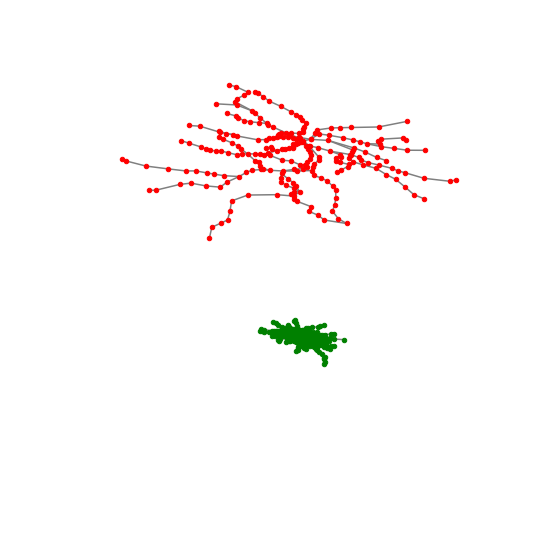

In [17]:
intdNetworkDraw(intd_G)

# TEST

### ER

400
1.0


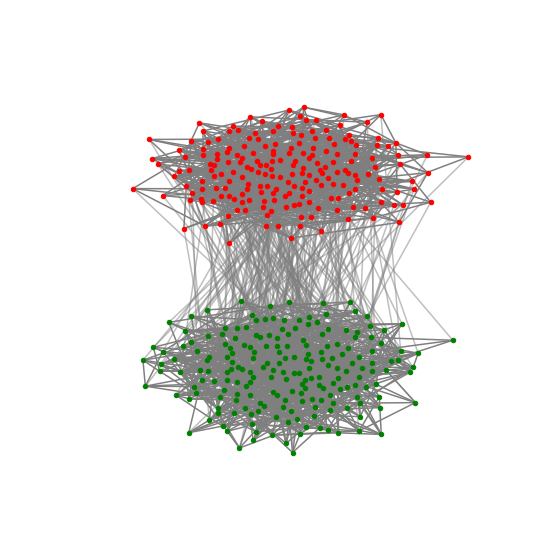

350
1.0


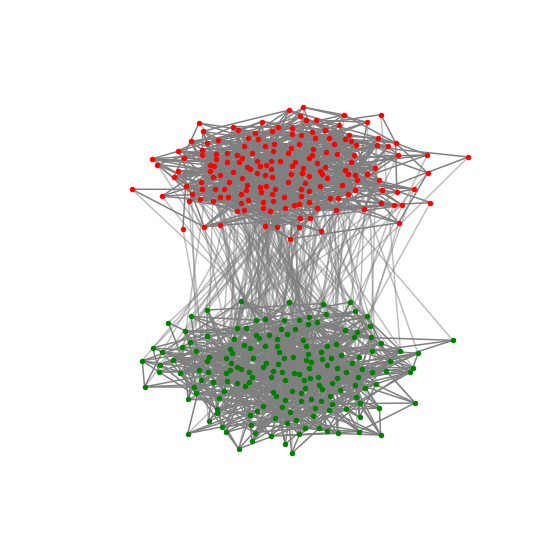

:)


In [28]:
# %%
# 1 ER
ER_a = networkER_w_3Dpos(200, 10, 1)
ER_b = networkER_w_3Dpos(200, 10, 2)
intd_ER = intd_random_net(ER_a, ER_b)

print(len(intd_ER.nodes()))
print(compute_pinf(intd_ER))
intdNetworkDraw(intd_ER)

# %%
# 1-1 ER Attacked
intd_ER_attck = attack_network(intd_ER, ER_a, ER_b, 0.9, False)

print(len(intd_ER_attck.nodes()))
print(compute_pinf(intd_ER_attck))
intdNetworkDraw(intd_ER_attck)
print(":)")

### SF_BA

In [ ]:
# %%
# 2 SF_BA
SF_BA_a = networkSF_w_3Dpos_BA(2000, 2, 1)
SF_BA_b = networkSF_w_3Dpos_BA(2000, 2, 2)
intd_SF_BA = intd_random_net(SF_BA_a, SF_BA_b)

print(len(intd_SF_BA.nodes()))
intdNetworkDraw(intd_SF_BA)
print(compute_pinf(intd_SF_BA))


# %%
# 2-1 SF_BA Attacked
intd_SF_BA_attck = attack_network(intd_SF_BA, SF_BA_a, SF_BA_b, 0.9, False)

print(len(intd_SF_BA_attck.nodes()))
intdNetworkDraw(intd_SF_BA_attck)
print(compute_pinf(intd_SF_BA_attck))


### SF_PowerL

In [120]:
# %%
# 3 SF_PowerL
SF_PowerL_a = networkSF_w_3Dpos_PowerL(2000, 3, 1)
SF_PowerL_b = networkSF_w_3Dpos_PowerL(2000, 3, 2)
intd_SF_PowerL = intd_random_net(SF_PowerL_a, SF_PowerL_b)

print(len(intd_SF_PowerL.nodes()))
print(compute_pinf(intd_SF_PowerL))

#intdNetworkDraw(intd_SF_PowerL)

# %%
# 3-1 SF_PowerL Attacked
intd_SF_PowerL_attck = attack_network(intd_SF_PowerL, SF_PowerL_a, SF_PowerL_b, 0.9, False)
print(len(intd_SF_PowerL_attck.nodes()))
print(compute_pinf(intd_SF_PowerL_attck))

#intdNetworkDraw(intd_SF_PowerL_attck)

print(":)")
# %%

Generate Scale-Free Network based on given powerLaw parameters
(iter: 16. Last gamma:3.017547)
Generate Scale-Free Network based on given powerLaw parameters
(iter: 63. Last gamma:3.043686)
4000
1.0
3520
0.9545454545454546
:)
